In [41]:
import numpy as np
import math

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris

from poliastro.bodies import Sun,Venus, Earth, Jupiter, Saturn
from poliastro.threebody import flybys
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.iod import izzo
from poliastro.plotting import OrbitPlotter2D
from poliastro.util import norm
import poliastro.twobody.propagation as Propagation

import matplotlib.pyplot  as plt

from scipy import optimize as opt
 
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [5]:
t_launch = Time("2021-10-21")
t_vflyby = Time("2022-02-04")
t_arrive = Time("2029-10-28")
o_e = Orbit.from_body_ephem(Earth,t_launch)
o_v = Orbit.from_body_ephem(Venus, t_vflyby)
o_s = Orbit.from_body_ephem(Saturn, t_arrive)

/Users/Devansh/anaconda3/lib/python3.6/site-packages/poliastro/twobody/orbit.py:389: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2021-10-21 00:01:09.182. Use Time(..., scale='tdb') instead.

/Users/Devansh/anaconda3/lib/python3.6/site-packages/poliastro/twobody/orbit.py:389: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2022-02-04 00:01:09.185. Use Time(..., scale='tdb') instead.

/Users/Devansh/anaconda3/lib/python3.6/site-packages/poliastro/twobody/orbit.py:389: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2029-10-28 00:01:09.182. Use Time(..., scale='tdb') instead.



In [7]:
op = OrbitPlotter2D()
op.plot(o_e)
op.plot(o_v)
op.plot(o_s)

/Users/Devansh/anaconda3/lib/python3.6/site-packages/poliastro/twobody/propagation.py:232: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(31, 119, 180)', 'dash':…

In [8]:
o_eL = Orbit.from_body_ephem(Earth,t_launch)
o_vL = Orbit.from_body_ephem(Venus, t_launch)
o_sL = Orbit.from_body_ephem(Saturn, t_launch)

/Users/Devansh/anaconda3/lib/python3.6/site-packages/poliastro/twobody/orbit.py:389: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2021-10-21 00:01. Use Time(..., scale='tdb') instead.



In [10]:
op = OrbitPlotter2D()
op.plot(o_eL)
op.plot(o_vL)
op.plot(o_sL)

/Users/Devansh/anaconda3/lib/python3.6/site-packages/poliastro/twobody/propagation.py:232: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(31, 119, 180)', 'dash':…

In [34]:
t_launchNew = Time("2019-05-01") + 23.819*u.year

o_eL2 = Orbit.from_body_ephem(Earth,t_launchNew)
o_vL2 = Orbit.from_body_ephem(Venus, t_launchNew)
o_sL2 = Orbit.from_body_ephem(Saturn, t_launchNew)

print(np.arccos(np.dot(o_eL2.r,o_vL2.r)*u.km*u.km/(norm(o_eL2.r)*norm(o_vL2.r))).to(u.deg))
print(np.arccos(np.dot(o_eL2.r,o_sL2.r)*u.km*u.km/(norm(o_eL2.r)*norm(o_sL2.r))).to(u.deg))

op = OrbitPlotter2D()
op.plot(o_eL2)
op.plot(o_vL2)
op.plot(o_sL2)


/Users/Devansh/anaconda3/lib/python3.6/site-packages/poliastro/twobody/orbit.py:389: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2043-02-23 21:22:23.585. Use Time(..., scale='tdb') instead.



77.05602454928496 deg
68.17692787470975 deg


/Users/Devansh/anaconda3/lib/python3.6/site-packages/poliastro/twobody/propagation.py:232: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(31, 119, 180)', 'dash':…

In [14]:
(o_eL.nu - o_vL.nu).to(u.deg)


<Quantity 67.83126667852521 deg>

In [15]:
(o_eL.nu - o_sL.nu).to(u.deg)

<Quantity 33.41602471120089 deg>

In [30]:
np.arccos(np.dot(o_eL.r,o_vL.r)*u.km*u.km/(norm(o_eL.r)*norm(o_vL.r))).to(u.deg)

<Quantity 47.792592137897834 deg>

In [31]:
np.arccos(np.dot(o_eL.r,o_sL.r)*u.km*u.km/(norm(o_eL.r)*norm(o_sL.r))).to(u.deg)

<Quantity 75.62160683323914 deg>

In [21]:
o_eL.r * o_vL.r

<Quantity [  1.32119384e+16, -1.95708806e+15, -5.60261035e+14] km2>

In [23]:
o_eL.r

<Quantity [  1.30841299e+08,  6.36601157e+07,  2.76225216e+07] km>

In [24]:
o_vL.r

<Quantity [  1.00976821e+08, -3.07427664e+07, -2.02827621e+07] km>

In [25]:
1.308413*10**8*1.0097682*10**8

1.3211938398665998e+16

In [35]:
vinf = np.linspace(0*u.km/u.s, 6*u.km/u.s)

In [36]:
rp = 1.2*Saturn.R;
ra = 200*Saturn.R;

dv = (Saturn.k*(2/rp-1/ra))**0.5 - (vinf**2 + 2*Saturn.k/rp)**0.5

In [37]:
dv

<Quantity [ -48.61795275, -48.84942529, -49.54383298, -50.70114604,
            -52.32131486, -54.40426999, -56.94992215, -59.9581623 ,
            -63.42886158, -67.3618714 , -71.75702348, -76.61412981,
            -81.9329828 , -87.7133552 , -93.95500027,-100.65765175,
           -107.82102394,-115.44481176,-123.52869085,-132.07231756,
           -141.0753291 ,-150.53734357,-160.45796007,-170.83675877,
           -181.67330098,-192.96712927,-204.71776756,-216.92472122,
           -229.58747714,-242.7055039 ,-256.27825182,-270.30515311,
           -284.78562196,-299.71905468,-315.10482983,-330.94230831,
           -347.23083355,-363.96973156,-381.15831116,-398.79586404,
           -416.88166494,-435.41497181,-454.39502591,-473.82105201,
           -493.69225849,-514.00783757,-534.76696538,-555.9688022 ,
           -577.61249257,-599.69716547] m / s>

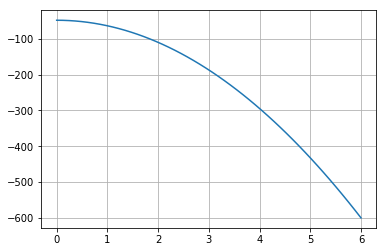

In [44]:
plt.figure()
plt.plot(vinf,dv)
plt.grid()